<a href="https://colab.research.google.com/github/sandhya-bdb/CNN-model-for-Fruit-Classification-using-ResNet50/blob/main/week_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Dataset: Begin by loading the dataset provided.
# Data Augmentation: Apply transformations such as random flip, rotation, color jitter, resizing, etc., to augment the data and enhance model performance.
# Dataset Splitting: Split the dataset into training, validation, and testing sets.
# Visualization: Visualize a few images from the dataset to develop an understanding of the data.

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
import torchvision.models as models
from matplotlib import pyplot as plt

In [ ]:
device = torch.device("cuda" )
device

device(type='cuda')

In [ ]:
image_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
!find /content -type d -name ".ipynb_checkpoints" -exec rm -rf {} +


In [ ]:
import os
os.listdir('/content')




['.config', 'dataset.zip', 'sample_data']

In [ ]:
!unzip /content/dataset.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/FRUIT-16K/S_Lemon/458.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/935.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/89.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/1000.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/773.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/692.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/854.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/575.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/737.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/656.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/494.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/818.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/100.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/971.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/1.jpg  
  inflating: /content/dataset/FRUIT-16K/S_Lemon/890.jpg  
  inflating: /content/d

In [ ]:
dataset_path = "/content/dataset/FRUIT-16K"


In [ ]:
dataset = datasets.ImageFolder(root=dataset_path, transform=image_transforms)
print(f"Classes found: {dataset.classes}")
print(f"Number of classes: {len(dataset.classes)}")
print(f"Number of samples: {len(dataset)}")


Classes found: ['F_Banana', 'F_Lemon', 'F_Lulo', 'F_Mango', 'F_Orange', 'F_Strawberry', 'F_Tamarillo', 'F_Tomato', 'S_Banana', 'S_Lemon', 'S_Lulo', 'S_Mango', 'S_Orange', 'S_Strawberry', 'S_Tamarillo', 'S_Tomato']
Number of classes: 16
Number of samples: 16000


In [ ]:
class_names = dataset.classes
class_names

['F_Banana',
 'F_Lemon',
 'F_Lulo',
 'F_Mango',
 'F_Orange',
 'F_Strawberry',
 'F_Tamarillo',
 'F_Tomato',
 'S_Banana',
 'S_Lemon',
 'S_Lulo',
 'S_Mango',
 'S_Orange',
 'S_Strawberry',
 'S_Tamarillo',
 'S_Tomato']

In [ ]:
num_classes = len(dataset.classes)
num_classes

16

In [ ]:
train_size = int(0.70*len(dataset))
val_size = len(dataset) - train_size

train_size, val_size

(11200, 4800)

In [ ]:
from torch.utils.data import random_split

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 3, 224, 224])
torch.Size([32])


In [ ]:
labels[10]

tensor(4)

In [ ]:
images[10].shape

torch.Size([3, 224, 224])

In [ ]:
images[10].permute(1,2,0).shape

torch.Size([224, 224, 3])

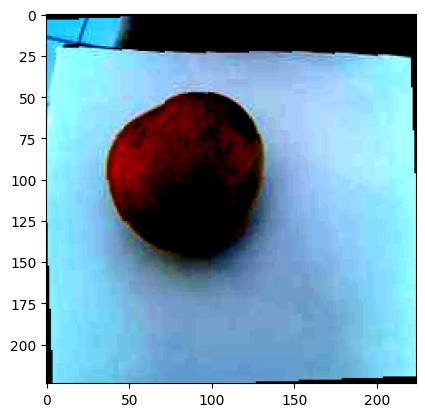

In [ ]:
plt.imshow(images[0].permute(1,2,0))
plt.show()

In [ ]:
images[30].permute(1,2,0).shape

torch.Size([224, 224, 3])

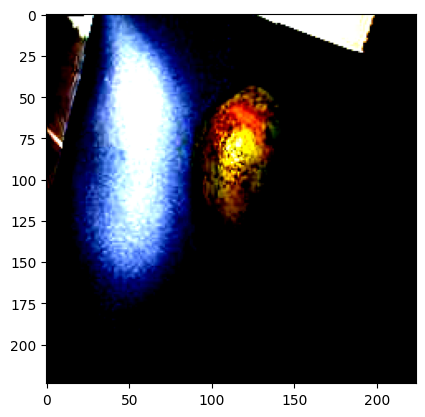

In [ ]:
plt.imshow(images[30].permute(1,2,0))
plt.show()

In [ ]:
images[15].permute(1,2,0).shape

torch.Size([224, 224, 3])

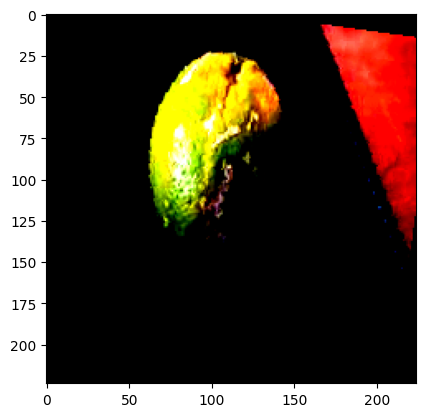

In [ ]:
plt.imshow(images[15].permute(1,2,0))
plt.show()

In [ ]:
#Tasks:
#Model Training: Begin by building a CNN model. For this task, avoid using transfer learning or regularization techniques initially.
#Validation and Testing: Evaluate the model on both validation and test datasets.
#Optimize Epochs: Experiment with different numbers of training epochs.

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


## model 1: CNN

In [ ]:
class FruitClassifierCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1), # (16, 224, 224)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (16, 112, 112),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (32, 56, 56)
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (64, 28, 28),
            nn.Flatten(),
            nn.Linear(64*28*28, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.network(x)
        return x

In [ ]:
images.size(0)

32

In [ ]:
len(train_loader.dataset)

11200

In [ ]:
# 1) DataLoaders with single-threaded loading (helps with notebook timeouts)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)

def train_model(model, criterion, optimizer, train_loader, val_loader, device, epochs=3):
    import time
    start = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for batch_num, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

            if (batch_num + 1) % 10 == 0:
                print(f"Batch: {batch_num+1}, Epoch: {epoch+1}, Loss: {loss.item():0.4f}")

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch [{epoch+1}/{epochs}], Avg Loss: {epoch_loss:.4f}")

        model.eval()
        correct, total = 0, 0
        all_labels, all_predictions = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

        val_accuracy = 100.0 * correct / total if total > 0 else 0.0
        print(f"*** Validation Accuracy: {val_accuracy:.2f}% ***")

    end = time.time()
    print(f"Execution time: {end - start:.2f} seconds")

    return all_labels, all_predictions


In [ ]:
model = FruitClassifierCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
all_labels, all_predictions = train_model(
    model, criterion, optimizer,
    train_loader, val_loader, device,
    epochs=3
)


Batch: 10, Epoch: 1, Loss: 2.7503
Batch: 20, Epoch: 1, Loss: 2.3714
Batch: 30, Epoch: 1, Loss: 2.2960
Batch: 40, Epoch: 1, Loss: 1.6709
Batch: 50, Epoch: 1, Loss: 1.5096
Batch: 60, Epoch: 1, Loss: 1.3072
Batch: 70, Epoch: 1, Loss: 1.1505
Batch: 80, Epoch: 1, Loss: 1.1896
Batch: 90, Epoch: 1, Loss: 1.4441
Batch: 100, Epoch: 1, Loss: 0.9790
Batch: 110, Epoch: 1, Loss: 0.9423
Batch: 120, Epoch: 1, Loss: 0.9891
Batch: 130, Epoch: 1, Loss: 0.8535
Batch: 140, Epoch: 1, Loss: 0.6873
Batch: 150, Epoch: 1, Loss: 0.8206
Batch: 160, Epoch: 1, Loss: 0.7703
Batch: 170, Epoch: 1, Loss: 0.7510
Epoch [1/3], Avg Loss: 1.3791
*** Validation Accuracy: 72.54% ***
Batch: 10, Epoch: 2, Loss: 0.5657
Batch: 20, Epoch: 2, Loss: 0.7177
Batch: 30, Epoch: 2, Loss: 0.6364
Batch: 40, Epoch: 2, Loss: 0.8110
Batch: 50, Epoch: 2, Loss: 0.6873
Batch: 60, Epoch: 2, Loss: 0.4758
Batch: 70, Epoch: 2, Loss: 0.6427
Batch: 80, Epoch: 2, Loss: 0.3638
Batch: 90, Epoch: 2, Loss: 0.5474
Batch: 100, Epoch: 2, Loss: 0.6881
Batch: 

In [ ]:
#Training and Validation: Plot training and validation accuracy to check for overfitting.
#Regularization Techniques: Apply techniques like batch normalization, weight decay, dropout, and early stopping to improve model performance.
#Hyperparameter Tuning: Experiment with hyperparameters to further increase accuracy.
#Model Saving: Save the best-performing model for future use.

## Model2: CNN with Regularization

In [ ]:
class FruitClassifierCNNWithRegularization(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1), # (16, 224, 224)
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (16, 112, 112),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (32, 56, 56)
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), # (64, 28, 28),
            nn.Flatten(),
            nn.Linear(64*28*28, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.network(x)
        return x

In [ ]:
model = FruitClassifierCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
all_labels, all_predictions = train_model(
    model, criterion, optimizer,
    train_loader, val_loader, device,
    epochs=3
)

Batch: 10, Epoch: 1, Loss: 2.7266
Batch: 20, Epoch: 1, Loss: 2.5662
Batch: 30, Epoch: 1, Loss: 2.3651
Batch: 40, Epoch: 1, Loss: 2.0417
Batch: 50, Epoch: 1, Loss: 1.8375
Batch: 60, Epoch: 1, Loss: 1.5497
Batch: 70, Epoch: 1, Loss: 1.3988
Batch: 80, Epoch: 1, Loss: 1.2106
Batch: 90, Epoch: 1, Loss: 0.9150
Batch: 100, Epoch: 1, Loss: 1.2667
Batch: 110, Epoch: 1, Loss: 0.9063
Batch: 120, Epoch: 1, Loss: 0.9683
Batch: 130, Epoch: 1, Loss: 1.1971
Batch: 140, Epoch: 1, Loss: 0.8724
Batch: 150, Epoch: 1, Loss: 1.1444
Batch: 160, Epoch: 1, Loss: 0.7804
Batch: 170, Epoch: 1, Loss: 0.7127
Epoch [1/3], Avg Loss: 1.5174
*** Validation Accuracy: 73.10% ***
Batch: 10, Epoch: 2, Loss: 0.6669
Batch: 20, Epoch: 2, Loss: 0.6724
Batch: 30, Epoch: 2, Loss: 0.8785
Batch: 40, Epoch: 2, Loss: 0.5708
Batch: 50, Epoch: 2, Loss: 0.6056
Batch: 60, Epoch: 2, Loss: 0.6371
Batch: 70, Epoch: 2, Loss: 0.7244
Batch: 80, Epoch: 2, Loss: 0.6049
Batch: 90, Epoch: 2, Loss: 0.5195
Batch: 100, Epoch: 2, Loss: 0.4939
Batch: 

In [ ]:
#Apply Transfer Learning: Use a pre-trained model like ResNet50 to train the model.
#Save the Model: Save the trained model to disk for future use.


##model 3: CNN with ResNet50


In [ ]:
# Load the pre-trained ResNet model
class FruitClassifierResNet(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.5):
        super().__init__()
        self.model = models.resnet50(weights='DEFAULT')
        # Freeze all layers except the final fully connected layer
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze layer4 and fc layers
        for param in self.model.layer4.parameters():
            param.requires_grad = True

        # Replace the final fully connected layer
        self.model.fc = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.model.fc.in_features, num_classes)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
model = FruitClassifierCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

all_labels, all_predictions = train_model(
    model, criterion, optimizer,
    train_loader, val_loader, device,
    epochs=3
)





Batch: 10, Epoch: 1, Loss: 2.7023
Batch: 20, Epoch: 1, Loss: 2.3773
Batch: 30, Epoch: 1, Loss: 2.0994
Batch: 40, Epoch: 1, Loss: 1.8947
Batch: 50, Epoch: 1, Loss: 1.6334
Batch: 60, Epoch: 1, Loss: 1.4369
Batch: 70, Epoch: 1, Loss: 1.4986
Batch: 80, Epoch: 1, Loss: 1.4897
Batch: 90, Epoch: 1, Loss: 1.2317
Batch: 100, Epoch: 1, Loss: 1.1565
Batch: 110, Epoch: 1, Loss: 0.9497
Batch: 120, Epoch: 1, Loss: 0.6957
Batch: 130, Epoch: 1, Loss: 0.9744
Batch: 140, Epoch: 1, Loss: 0.8278
Batch: 150, Epoch: 1, Loss: 1.0777
Batch: 160, Epoch: 1, Loss: 0.9007
Batch: 170, Epoch: 1, Loss: 0.9816
Epoch [1/3], Avg Loss: 1.4156
*** Validation Accuracy: 71.46% ***
Batch: 10, Epoch: 2, Loss: 0.8494
Batch: 20, Epoch: 2, Loss: 0.7562
Batch: 30, Epoch: 2, Loss: 0.6565
Batch: 40, Epoch: 2, Loss: 0.7528
Batch: 50, Epoch: 2, Loss: 0.5236
Batch: 60, Epoch: 2, Loss: 0.5855
Batch: 70, Epoch: 2, Loss: 0.5425
Batch: 80, Epoch: 2, Loss: 0.4955
Batch: 90, Epoch: 2, Loss: 0.5816
Batch: 100, Epoch: 2, Loss: 0.3336
Batch: 

## model 4 : CNN with hyperparameter tuning ResNet50


In [ ]:
model = FruitClassifierResNet(num_classes=num_classes, dropout_rate=0.4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.00001)


all_labels, all_predictions = train_model(
    model, criterion, optimizer,
    train_loader, val_loader, device,
    epochs=3
)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 192MB/s]


Batch: 10, Epoch: 1, Loss: 2.7665
Batch: 20, Epoch: 1, Loss: 2.7684
Batch: 30, Epoch: 1, Loss: 2.7309
Batch: 40, Epoch: 1, Loss: 2.7047
Batch: 50, Epoch: 1, Loss: 2.6909
Batch: 60, Epoch: 1, Loss: 2.6695
Batch: 70, Epoch: 1, Loss: 2.6751
Batch: 80, Epoch: 1, Loss: 2.6452
Batch: 90, Epoch: 1, Loss: 2.6400
Batch: 100, Epoch: 1, Loss: 2.5630
Batch: 110, Epoch: 1, Loss: 2.5278
Batch: 120, Epoch: 1, Loss: 2.5360
Batch: 130, Epoch: 1, Loss: 2.4503
Batch: 140, Epoch: 1, Loss: 2.3414
Batch: 150, Epoch: 1, Loss: 2.3850
Batch: 160, Epoch: 1, Loss: 2.2890
Batch: 170, Epoch: 1, Loss: 2.1912
Epoch [1/3], Avg Loss: 2.5780
*** Validation Accuracy: 77.65% ***
Batch: 10, Epoch: 2, Loss: 2.1582
Batch: 20, Epoch: 2, Loss: 1.9563
Batch: 30, Epoch: 2, Loss: 1.9805
Batch: 40, Epoch: 2, Loss: 1.8774
Batch: 50, Epoch: 2, Loss: 1.7455
Batch: 60, Epoch: 2, Loss: 1.6869
Batch: 70, Epoch: 2, Loss: 1.5739
Batch: 80, Epoch: 2, Loss: 1.5585
Batch: 90, Epoch: 2, Loss: 1.4766
Batch: 100, Epoch: 2, Loss: 1.4016
Batch: 

## Model Evaluation using Confusion Matrix and Classification Report


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       0.98      1.00      0.99       311
           2       0.99      1.00      0.99       293
           3       0.98      0.99      0.98       302
           4       0.99      0.98      0.98       276
           5       1.00      1.00      1.00       299
           6       0.98      1.00      0.99       305
           7       0.98      0.99      0.98       317
           8       1.00      1.00      1.00       303
           9       1.00      0.98      0.99       313
          10       0.99      0.97      0.98       276
          11       1.00      1.00      1.00       282
          12       0.99      0.98      0.98       286
          13       1.00      1.00      1.00       320
          14       0.99      0.98      0.98       297
          15       0.99      0.96      0.98       320

    accuracy                           0.99      4800
   macro avg       0.99   

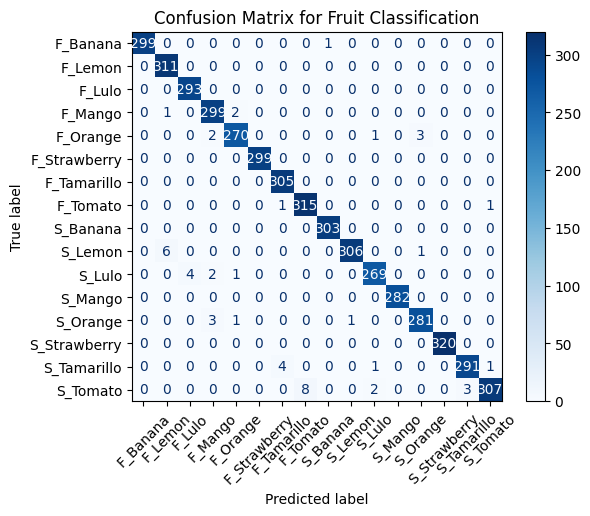

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

conf_matrix = confusion_matrix(all_labels, all_predictions, labels=np.arange(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for Fruit Classification")
plt.show()

## Saving the model

In [ ]:
torch.save(model.state_dict(), 'saved_model.pth')